<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/Feature_Engineering_B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Engineering
===
*FTW Batch 10 - Jan 11 2025

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Feature engineering turn your inputs into things the algorithm can understand.

In [2]:
# Install required packages
!pip install numpy pandas matplotlib seaborn scikit-learn


  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 51.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 51.5 MB/s eta 0:00:0000:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 43.0 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.5 MB/s eta 0:00:00
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

Data Loading

In [4]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Dummy Variables ###

In [5]:
df.day.head()

0    fri
1    tue
2    sat
3    fri
4    sun
Name: day, dtype: object

In [6]:
pd.get_dummies(df.day).head()

,fri,mon,sat,sun,thu,tue,wed
0,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False
3,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False


In [11]:
# alternative: OneHotEncoder
# Install required packages
!pip install scikit-learn
# alternative: OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create encoder instance
encoder = OneHotEncoder(sparse_output=False)  # Updated from sparse=False

# Reshape data since OneHotEncoder expects 2D array
day_data = df.day.values.reshape(-1, 1)

# Fit and transform the data
day_encoded = encoder.fit_transform(day_data)

# Convert to DataFrame with feature names
day_encoded_df = pd.DataFrame(
    day_encoded,
    columns=encoder.get_feature_names_out(['day'])
)

# Display first few rows
# print(day_encoded_df.head())
day_encoded_df.head()

,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Feature Scaling ###

In [12]:
data = df[['temp','wind','rain']]
data

,temp,wind,rain
0,8.2,6.7,0.0
1,18.0,0.9,0.0
2,14.6,1.3,0.0
3,8.3,4.0,0.2
4,11.4,1.8,0.0
...,...,...,...
512,27.8,2.7,0.0
513,21.9,5.8,0.0
514,21.2,6.7,0.0
515,25.6,4.0,0.0


### Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

# Instantiate Standard Scaler
scaler = StandardScaler()
scaler.fit(data)

# Transform Original Data to zero mean and unit variance
transformed_data = scaler.transform(data)

# Convert to original dataframe schema
transformed_data_df = pd.DataFrame(transformed_data, columns=data.columns)

In [14]:
data.head()

,temp,wind,rain
0,8.2,6.7,0.0
1,18.0,0.9,0.0
2,14.6,1.3,0.0
3,8.3,4.0,0.2
4,11.4,1.8,0.0


In [15]:
transformed_data_df.head()

,temp,wind,rain
0,-1.842640,1.498614,-0.073268
1,-0.153278,-1.741756,-0.073268
2,-0.739383,-1.518282,-0.073268
3,-1.825402,-0.009834,0.603155
4,-1.291012,-1.238940,-0.073268


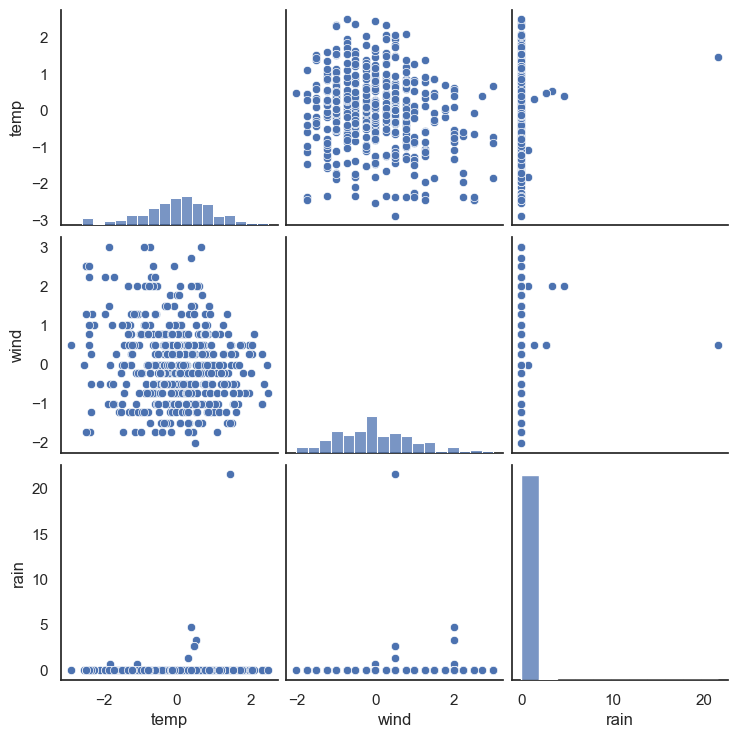

In [16]:
sns.pairplot(transformed_data_df)
# shows pairwise relationships in the dataset

# Label Encoder

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


### Binning ###

In [18]:
df.rain.describe()

count    517.000000
mean       0.021663
std        0.295959
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.400000
Name: rain, dtype: float64

Minimum is 0

Maximum is 6.4

Let's create 6 bins.

In [19]:
# Set Bins
# We start with a negative bin to include zeroes.
# Check documentation for more info on bins:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

bins = [-0.01, 1, 2, 3, 4, 5, 6]

# Create Group Names
group_names = ['0-0.99','1-1.99','2-2.99','3-3.99','4-4.99','5-5.99']

rainfall_categories = pd.cut(data['rain'], bins, labels=group_names)

rainfall_categories.head()

# https://pandas.pydata.org/docs/reference/api/pandas.cut.html

0    0-0.99
1    0-0.99
2    0-0.99
3    0-0.99
4    0-0.99
Name: rain, dtype: category
Categories (6, object): ['0-0.99' < '1-1.99' < '2-2.99' < '3-3.99' < '4-4.99' < '5-5.99']

In [20]:
rainfall_categories.value_counts()

rain
0-0.99    515
1-1.99      1
2-2.99      0
3-3.99      0
4-4.99      0
5-5.99      0
Name: count, dtype: int64

### Handling Missing Data ###
(Imputing)

In [21]:
weather_data = pd.read_csv("https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/weather.csv")
weather_data.head()

/var/folders/63/nh1b6vvn2ydd0rh21_cqt0f80000gp/T/ipykernel_30568/2295337346.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_data = pd.read_csv("https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/weather.csv")


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Drop missing data. Easiest but not advisable.
weather_data_dropped = weather_data.dropna(axis=0, subset=['WindGustSpd'])
weather_data_dropped.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
51177,20602,1945-2-1,11.43,29.632,27.222222,22.222222,25.000000,0,NaN,45,...,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN
51178,20602,1945-2-2,12.7,59.264,27.777778,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,10.2,NaN,NaN,NaN,NaN,NaN,NaN
51179,20602,1945-2-3,4.064,50.004,27.777778,22.777778,25.555556,0,NaN,45,...,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN
51180,20602,1945-2-4,22.606,40.744,26.666667,23.888889,25.555556,0,NaN,45,...,NaN,NaN,NaN,10.4,NaN,NaN,NaN,NaN,NaN,NaN
51181,20602,1945-2-5,73.914,51.856,26.111111,23.888889,25.000000,0,NaN,45,...,NaN,NaN,NaN,11.6,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Impute missing data. Most appropriate method.

# Get from dataframe only the columns we want to impute.
to_impute_data = weather_data[['WindGustSpd','MaxTemp','MinTemp','MeanTemp']]
to_impute_data.head()

,WindGustSpd,MaxTemp,MinTemp,MeanTemp
0,NaN,25.555556,22.222222,23.888889
1,NaN,28.888889,21.666667,25.555556
2,NaN,26.111111,22.222222,24.444444
3,NaN,26.666667,22.222222,24.444444
4,NaN,26.666667,21.666667,24.444444


In [24]:
from sklearn.impute import SimpleImputer

# Mean imputation( can be imputed by 'mean', 'median', 'most_frequent', 'constant')
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the data needed to impute
imp.fit(to_impute_data.values)

# Transform original data to impute based on choice of imputation parameter (mean, median, etc)
imputed_data = imp.transform(to_impute_data.values)

# Convert imputed data to original data schema
imputed_data_df = pd.DataFrame(imputed_data, columns=to_impute_data.columns)
imputed_data_df.head()

,WindGustSpd,MaxTemp,MinTemp,MeanTemp
0,37.774534,25.555556,22.222222,23.888889
1,37.774534,28.888889,21.666667,25.555556
2,37.774534,26.111111,22.222222,24.444444
3,37.774534,26.666667,22.222222,24.444444
4,37.774534,26.666667,21.666667,24.444444


### Merge Data

In [25]:
df1 = pd.DataFrame({'lkey': ['foo','bar','baz','foo'],
                    'value': [1,2,3,5]})

df2 = pd.DataFrame({'rkey':['foo','bar','baz','foo'],
                    'value': [5,6,7,8]})

In [26]:
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [27]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [28]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,bar,2,bar,6
3,baz,3,baz,7
4,foo,5,foo,5
5,foo,5,foo,8


In [29]:
df1.merge(df2, left_on='lkey', right_on='rkey',
          suffixes=('_left','_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,bar,2,bar,6
3,baz,3,baz,7
4,foo,5,foo,5
5,foo,5,foo,8


### Calculating Log Loss

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline
plt.style.use('ggplot')

In [31]:
data = load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [32]:
columns = ['alive', 'alone', 'embark_town', 'who', 'adult_male', 'deck']
data_2 = data.drop(columns, axis=1)

In [33]:
print(f"Max value of age column : {data_2['age'].max()}")
print(f"Min value of age column : {data_2['age'].min()}")

Max value of age column : 80.0
Min value of age column : 0.42


In [34]:
bins = [0, 5, 17, 25, 50, 80]
labels = ['Infant', 'Kid', 'Young', 'Adult', 'Old']
data_2['age'] = pd.cut(data_2['age'], bins = bins, labels=labels)
pd.DataFrame(data_2['age'].value_counts())

,count
age,
Adult,349
Young,188
Kid,69
Old,64
Infant,44


In [35]:
data_2['age'].mode()[0]

'Adult'

In [36]:
data_2 = data_2.fillna({'age' : data_2['age'].mode()[0]})

In [37]:
data_2['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [38]:
print(f"How many 'S' on embarked column : {data_2[data_2['embarked'] == 'S'].shape[0]}")
print(f"How many 'C' on embarked column : {data_2[data_2['embarked'] == 'C'].shape[0]}")
print(f"How many 'Q' on embarked column : {data_2[data_2['embarked'] == 'Q'].shape[0]}")

How many 'S' on embarked column : 644
How many 'C' on embarked column : 168
How many 'Q' on embarked column : 77


In [39]:
data_2 = data_2.fillna({'embarked' : 'S'})

In [40]:
data_2[['pclass', 'survived']].groupby(['pclass']).sum().sort_values(by='survived')
# survived by passenger class

,survived
pclass,
2,87
3,119
1,136


In [41]:
data_2[['age', 'survived']].groupby(['age']).sum().sort_values(by='survived')
# survied by age

/var/folders/63/nh1b6vvn2ydd0rh21_cqt0f80000gp/T/ipykernel_30568/2789375729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_2[['age', 'survived']].groupby(['age']).sum().sort_values(by='survived')


,survived
age,
Old,22
Kid,30
Infant,31
Young,63
Adult,196


In [42]:
data_2[['sex', 'survived']].groupby(['sex']).sum().sort_values(by='survived')

,survived
sex,
male,109
female,233


In [43]:
bins = [-1, 7.9104, 14.4542, 31, 512.330]
labels = ['low', 'medium-low', 'medium', 'high']
data_2['fare'] = pd.cut(data_2["fare"], bins = bins, labels = labels)

In [44]:
data_2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,Young,1,0,low,S,Third
1,1,1,female,Adult,1,0,high,C,First
2,1,3,female,Adult,0,0,medium-low,S,Third
3,1,1,female,Adult,1,0,high,S,First
4,0,3,male,Adult,0,0,medium-low,S,Third
...,...,...,...,...,...,...,...,...,...
886,0,2,male,Adult,0,0,medium-low,S,Second
887,1,1,female,Young,0,0,medium,S,First
888,0,3,female,Adult,1,2,medium,S,Third
889,1,1,male,Adult,0,0,medium,C,First


In [45]:
# class is the same as pclass

data_2 = data_2.drop('class', axis=1)

In [46]:
dummies = ['fare', 'age', 'embarked', 'sex']
dummy_data = pd.get_dummies(data_2[dummies])

# OHE

In [47]:
data_2 = pd.concat([data_2, dummy_data], axis = 1)
data_2.drop(dummies, axis=1, inplace=True)

In [48]:
data_2

,survived,pclass,sibsp,parch,fare_low,fare_medium-low,fare_medium,fare_high,age_Infant,age_Kid,age_Young,age_Adult,age_Old,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,1,0,True,False,False,False,False,False,True,False,False,False,False,True,False,True
1,1,1,1,0,False,False,False,True,False,False,False,True,False,True,False,False,True,False
2,1,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,True,False
3,1,1,1,0,False,False,False,True,False,False,False,True,False,False,False,True,True,False
4,0,3,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,True
887,1,1,0,0,False,False,True,False,False,False,True,False,False,False,False,True,True,False
888,0,3,1,2,False,False,True,False,False,False,False,True,False,False,False,True,True,False
889,1,1,0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,True


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
X = data_2.drop('survived', axis = 1)
y = data_2['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [52]:
# y_test.to_list()

In [53]:
accuracy_score(y_pred, y_test)

0.8067796610169492

In [54]:
from sklearn.metrics import log_loss
log_loss(y_test, log_reg.predict_proba(X_test))

# sklearn.metrics.log_loss(y_true, y_pred, *, eps='auto', normalize=True, sample_weight=None, labels=None)[source]


0.43564661112164554